In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
data = train.append(test).reset_index(drop = True)

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
print(train.isnull().sum())
print('*' * 30)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
******************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
print(train.info())
print('*' * 30)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  4

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Age and Cabin have some missing values

In [8]:
print(train.shape)
print('#' * 30)
print(test.shape)

(891, 12)
##############################
(418, 11)


,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='count'>

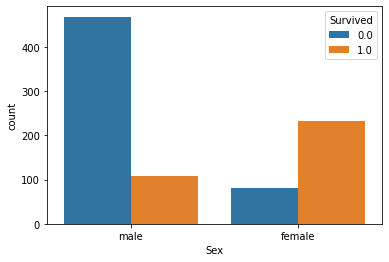

In [9]:
display(data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean())
sns.countplot(x = data['Sex'], hue = data['Survived'])

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='count'>

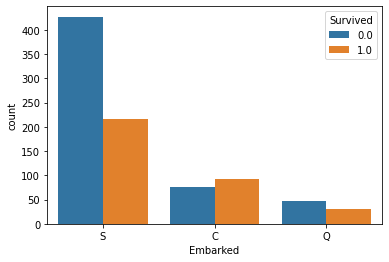

In [10]:
display(data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean())
sns.countplot(x = data['Embarked'], hue = data['Survived'])

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='count'>

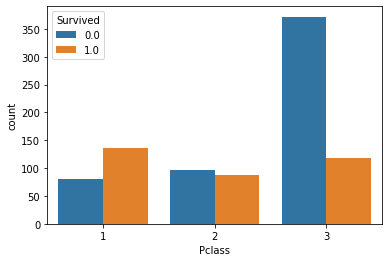

In [11]:
display(data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean())
sns.countplot(x = data['Pclass'], hue = data['Survived'])

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000
7,9,NaN


<AxesSubplot:xlabel='Parch', ylabel='count'>

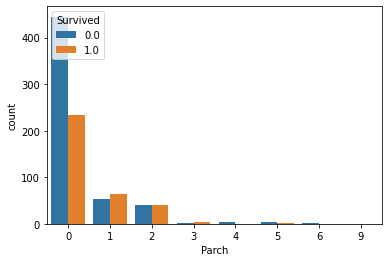

In [12]:
display(data[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean())
sns.countplot(x = data['Parch'], hue = data['Survived'])

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='count'>

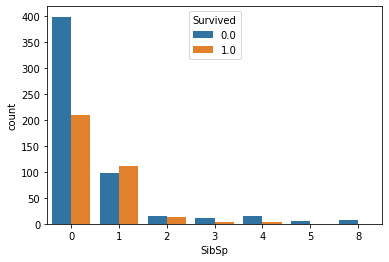

In [13]:
display(data[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean())
sns.countplot(x = data['SibSp'], hue = data['Survived'])

# > Data Cleaning

In [14]:
#assigning 0 and 1 to male and female
data['SexMF'] = data['Sex'].map({'male':0, 'female':1}) 
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexMF
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [15]:
#family feature with parch and sibsp
data['Fam'] = data['Parch'] + data['SibSp'] + 1
data['Fam'].head(3)

0    2
1    2
2    1
Name: Fam, dtype: int64

,Fam,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


<AxesSubplot:xlabel='Fam', ylabel='count'>

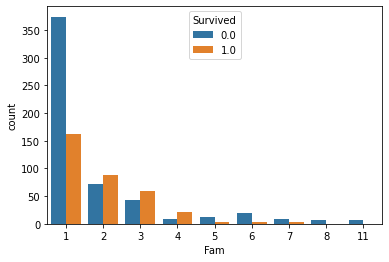

In [16]:
display(data[['Fam', 'Survived']].groupby(['Fam'], as_index = False).mean())
sns.countplot(x = data['Fam'], hue = data['Survived'])

,IsAlone,Survived
0,0,0.303538
1,1,0.505650


<AxesSubplot:xlabel='IsAlone', ylabel='count'>

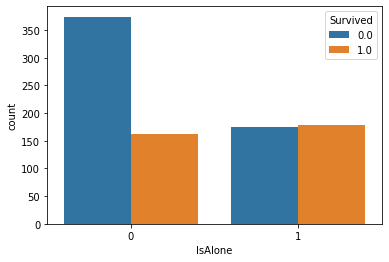

In [17]:
#pessengers, if they are alone or not?
data['IsAlone'] = 1
data.loc[data.Fam == 1, 'IsAlone'] = 0

display(data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean())
sns.countplot(x = data['IsAlone'], hue = data['Survived'])

In [18]:
#bins for Fare
data['Fare'].fillna(80.0, inplace = True)
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
SexMF             0
Fam               0
IsAlone           0
dtype: int64

In [19]:
data['FareBin'] = pd.qcut(data['Fare'], 6)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexMF,Fam,IsAlone,FareBin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,1,"(-0.001, 7.775]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,1,"(53.1, 512.329]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,"(7.775, 8.662]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,1,"(26.0, 53.1]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,"(7.775, 8.662]"


In [20]:
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Age'] = data['Age'].astype('int')
data['Age'].dtype
data['AgeBin'] = pd.qcut(data['Age'], 4)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexMF,Fam,IsAlone,FareBin,AgeBin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,2,1,"(-0.001, 7.775]","(-0.001, 22.0]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,2,1,"(53.1, 512.329]","(35.0, 80.0]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,"(7.775, 8.662]","(22.0, 29.0]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,2,1,"(26.0, 53.1]","(29.0, 35.0]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,1,0,"(7.775, 8.662]","(29.0, 35.0]"


In [21]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder()
data['FareBin'] = lb.fit_transform(data['FareBin'])

In [22]:
lb = LabelEncoder()
data['AgeBin'] = lb.fit_transform(data['AgeBin'])

In [23]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)
data['Embarken'] = lb.fit_transform(data['Embarked'])

In [24]:
#spliting train and test data
train_data = data[:len(train)]
test_data = data[len(train):]

#data training 
X_train = train_data.drop(labels = ['Survived', 'PassengerId'], axis = 1)
y_train = train_data['Survived']

In [25]:
features = ['SexMF', 'Pclass', 'FareBin', 'IsAlone', 'Fam', 'AgeBin', 'Embarken']
# X_test = test_data[features]

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [27]:
x_train = train_data[features]
y_train = train_data['Survived']
x_test = test_data[features]

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)
result1 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred1})
result1 = result1.astype('int')
result1.to_csv('submission1.csv', index = False)
result1.head(20)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
896,897,0
897,898,0
898,899,0
899,900,0
900,901,0


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lgr = LogisticRegression()
lgr.fit(x_train, y_train)
y_pred2 = lgr.predict(x_test)
result2 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred2})
result2 = result2.astype('int')
result2.to_csv('submission2.csv', index = False)
result2.head(20)


,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


In [30]:
xgbc = XGBClassifier(random_state = 3)
xgbc.fit(x_train, y_train)
y_pred3 = xgbc.predict(x_test)
result3 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred3})
result3 = result3.astype('int')
result3.to_csv('submission3.csv', index = False)
result3.head(20)

[17:52:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,0
898,899,0
899,900,1
900,901,1


In [31]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred4 = xgb.predict(x_test)
result4 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred4})
result4 = result4.astype('int')
result4.to_csv('submission4.csv', index = False)
result4.head(20)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
896,897,0
897,898,0
898,899,0
899,900,0
900,901,0


In [32]:
RFC = RandomForestClassifier(random_state=2, n_estimators=300, min_samples_split=40)
RFC.fit(x_train, y_train)
y_pred5 = RFC.predict(x_test)
result5 = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred5})
result5 = result5.astype('int')
result5.to_csv('submission5.csv', index = False)
result5.head(20)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0
